<a href="https://colab.research.google.com/github/sillyc0n/optimizer-notebooks/blob/main/HRP_Yahoo_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Downloading market data for HRP Portfolio Optimization...
🎯 Selected Assets:
   0P0000XBQ1.L: Invesco High Yield Class Z
   0P000011UT.L: Baillie Gifford High Yield Bond (Class B)
   0P00001BA4.L: Legal & General Active Global High Yield Bond ...
   0P000084C1.L: Aegon Asset Management High Yield Bond (Class B)
   0P0000NX0R.L: Royal London Corporate Bond (Class Z)
   0P0000N4FI.L: Schroders High Yield Opportunities (Class Z)
   0P0000SV4U.L: TwentyFour Dynamic Bond (Class I)
   0P000132YU.L: Artemis High Income (Class I Monthly)
   0P00013DPV.L: M&G Global Floating Rate High Yield (Class I-H)
   0P0001PP47.L: Franklin Templeton Global Income Optimiser (Cl...
   0P000176FS.L: Royal London Global Bond Opportunities (Class Z)
🔄 Downloading data for 11 tickers...
📊 Data shape: (506, 55)
📊 Column structure: <class 'pandas.core.indexes.multi.MultiIndex'>
✅ Downloaded 485 days of data
📈 Calculated returns from 2023-06-21 to 2025-06-16

📊 Return Statistics (Annualized):
--------------------

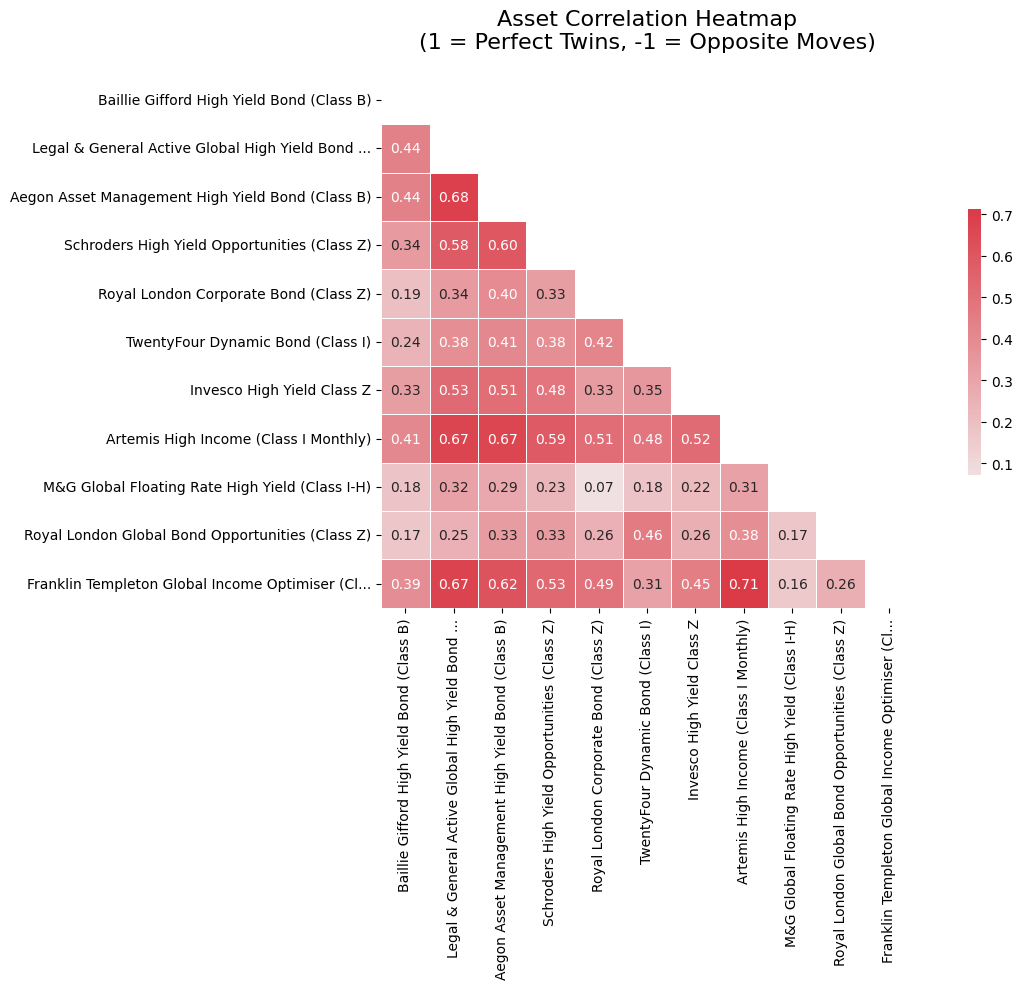

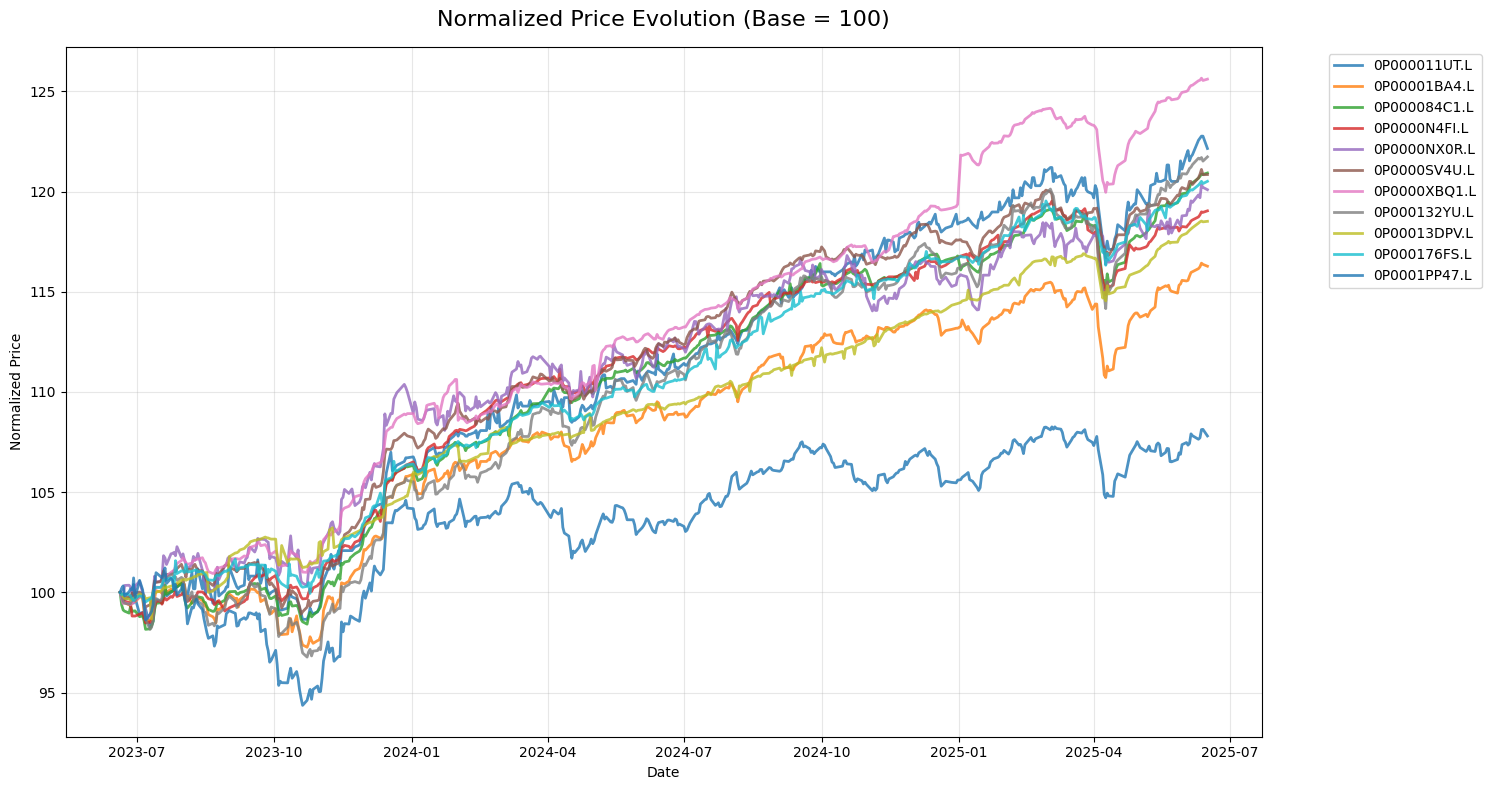

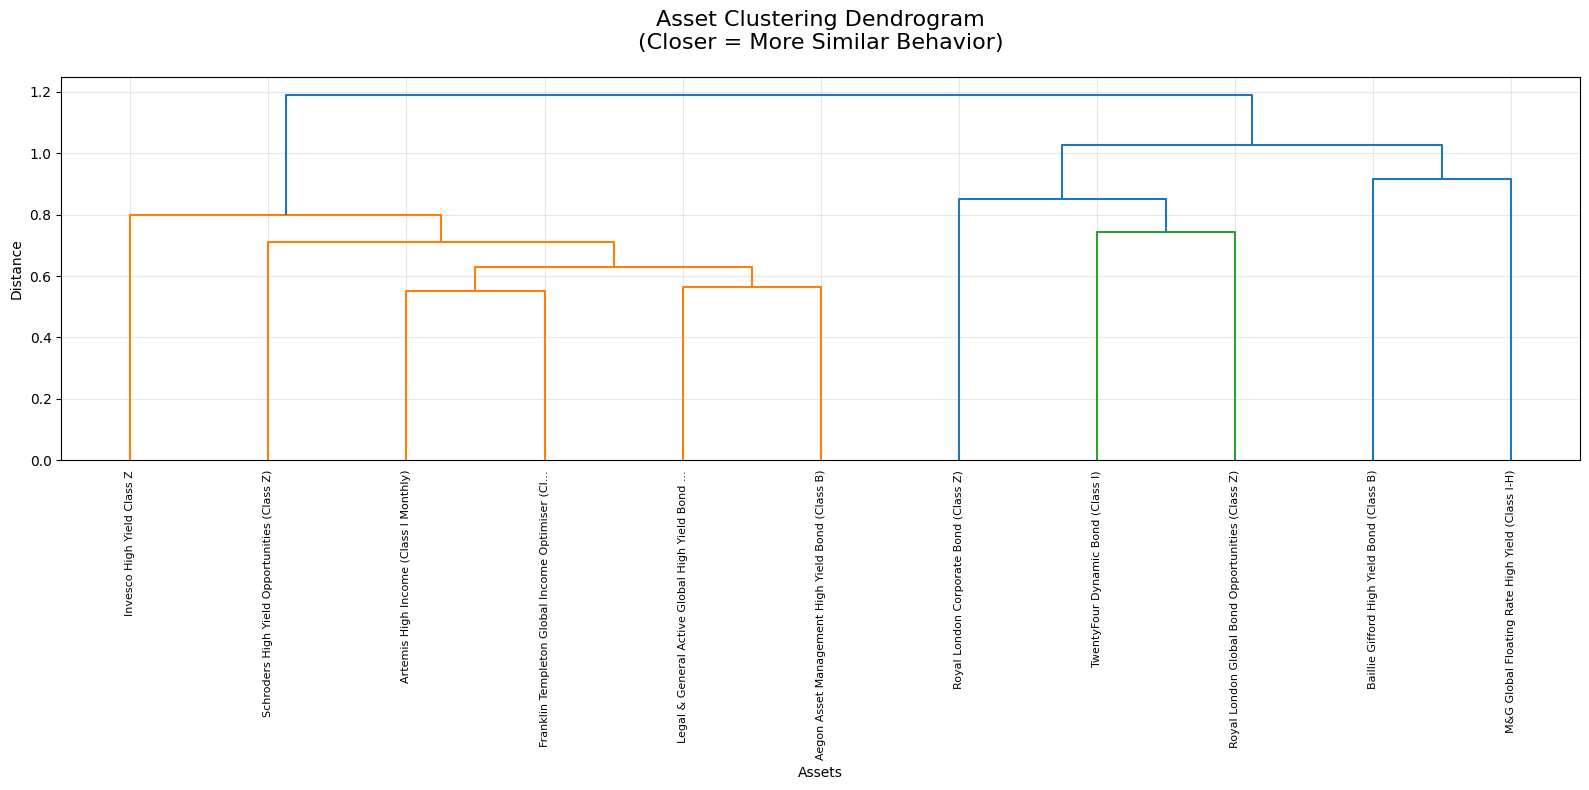

🔍 Clustering Insights:
Assets that are close together in the tree tend to move similarly
The algorithm will balance allocations across different clusters
✨ HRP Portfolio Weights:
----------------------------------------
Invesco High Yield Class Z:    30.5%
Schroders High Yield Opportunities (Class Z):    17.6%
M&G Global Floating Rate High Yield (Class I-H):    14.6%
TwentyFour Dynamic Bond (Class I):    10.3%
Royal London Global Bond Opportunities (Class Z):     7.0%
Royal London Corporate Bond (Class Z):     6.2%
Baillie Gifford High Yield Bond (Class B):     5.4%
Aegon Asset Management High Yield Bond (Class B):     3.2%
Legal & General Active Global High Yield Bond ...:     2.2%
Artemis High Income (Class I Monthly):     1.8%
Franklin Templeton Global Income Optimiser (Cl...:     1.2%

📋 Portfolio Weights (JSON format with Yahoo symbols):
------------------------------------------------------------
{
  "0P000011UT.L": 0.0539,
  "0P00001BA4.L": 0.0224,
  "0P000084C1.L": 0.0321,
  "0

ERROR:yfinance:HTTP Error 401: 


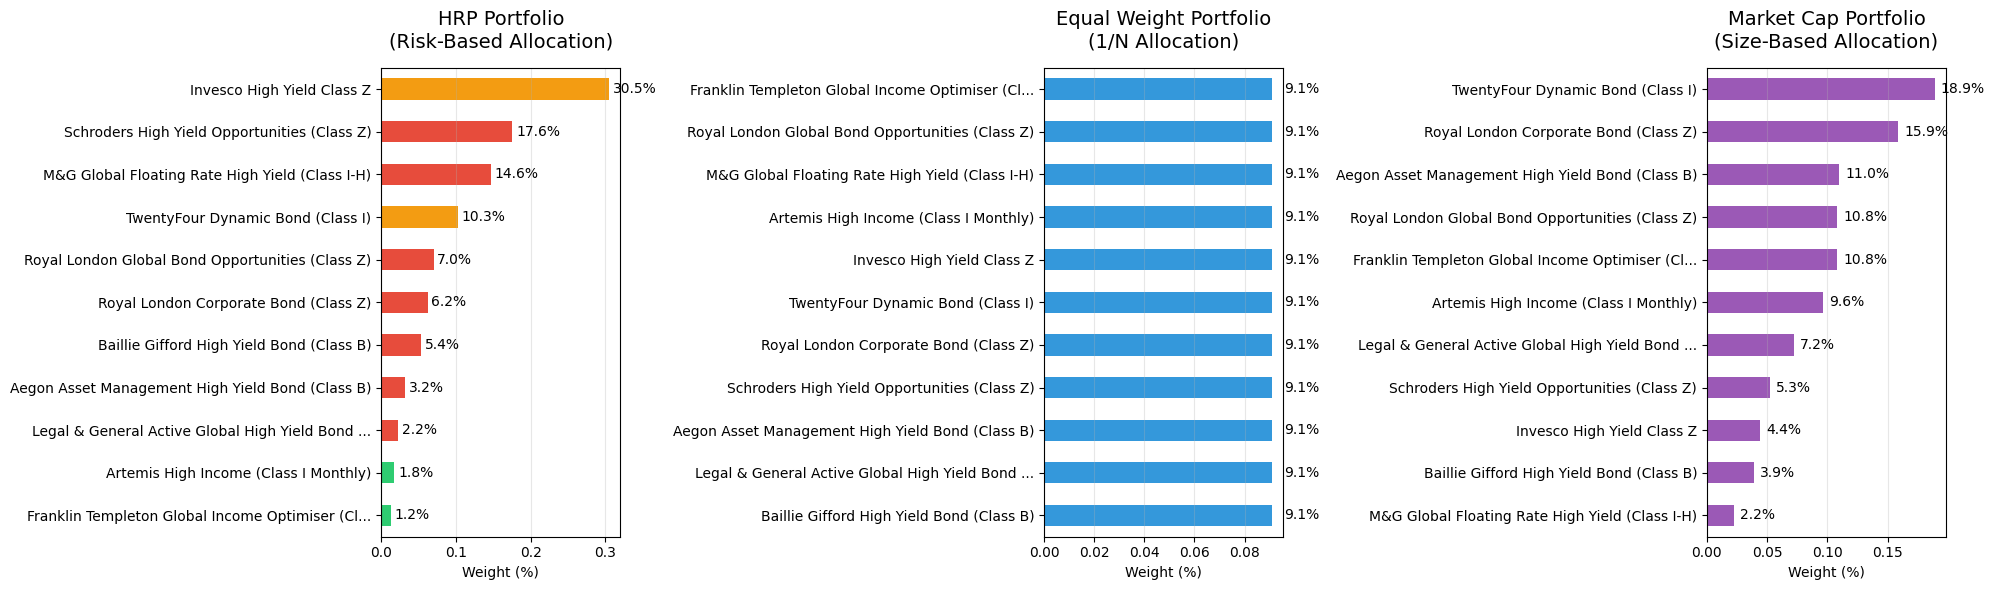

📊 Portfolio Performance Comparison:
                   HRP Portfolio  Equal Weight  Market Cap
Annual Return             0.1015        0.0929      0.0918
Annual Volatility         0.0247        0.0275      0.0290
Sharpe Ratio              4.1070        3.3784      3.1619
Max Drawdown             -0.0302       -0.0315     -0.0307
Calmar Ratio              3.3601        2.9473      2.9921


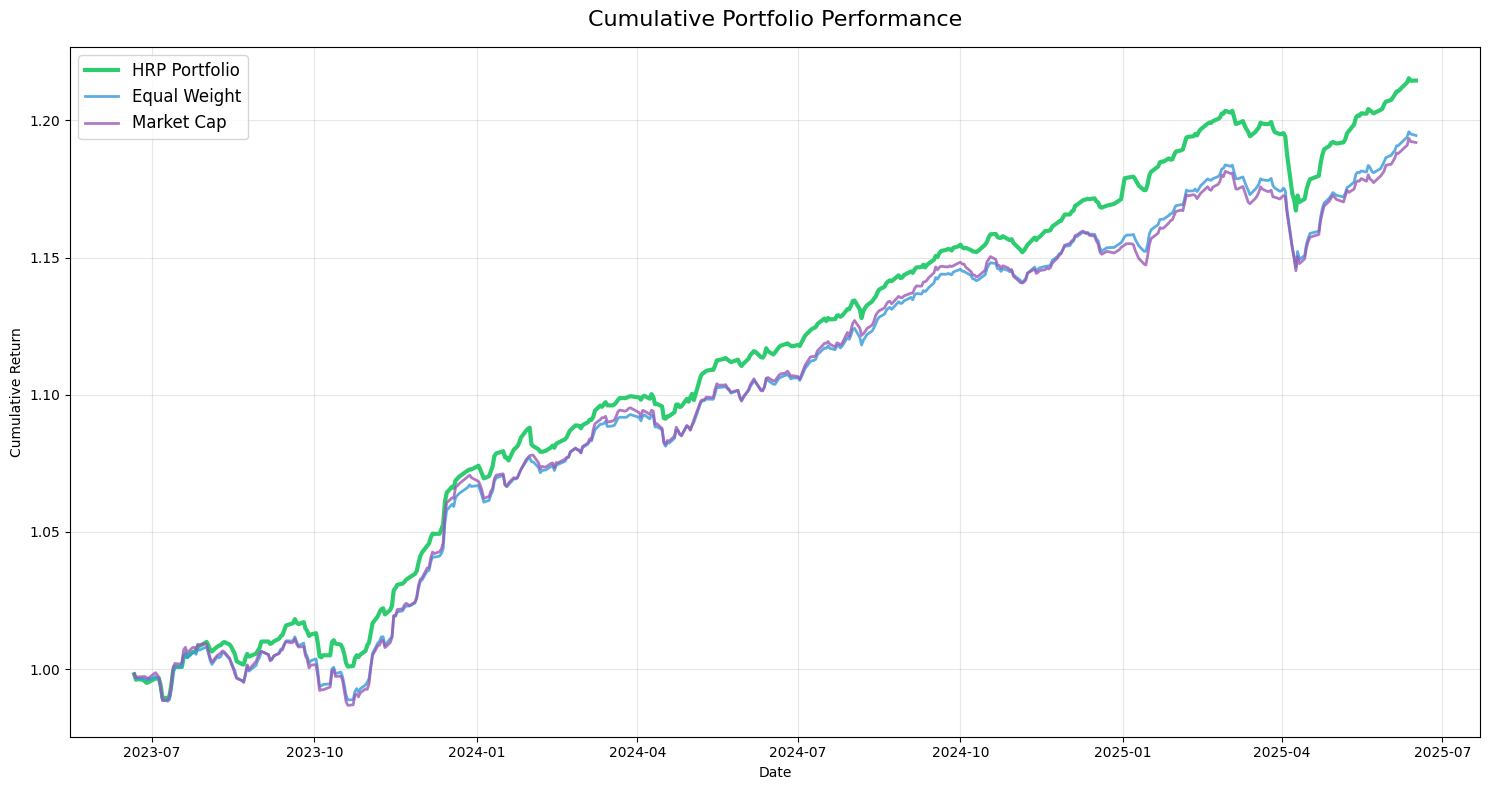

<Figure size 1500x600 with 0 Axes>

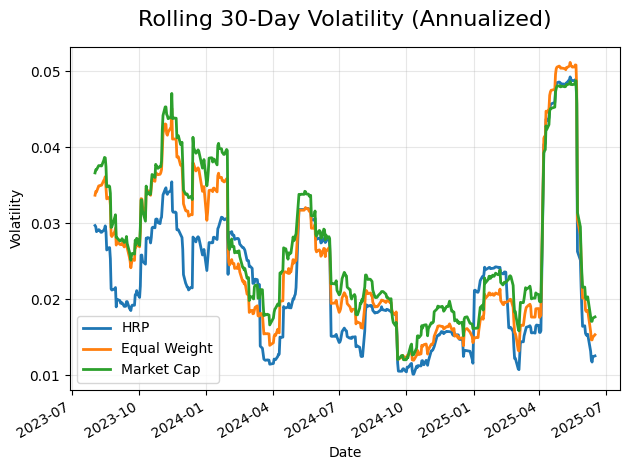

🎉 HRP Portfolio Optimization Complete!
📈 Your optimized portfolio is ready with 11 assets
🎯 Total portfolio weight: 100.0%
💪 Happy investing with smart diversification!


In [1]:
# -*- coding: utf-8 -*-
"""HRP Yahoo Finance.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1RW4L-4YDcU83dELTiXQLUzv0qvIJFjn6
"""

# -*- coding: utf-8 -*-
"""Hierarchical Risk Parity Portfolio Optimization with Yahoo Finance Data

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1dyBwqCHIJkHRBsRcnE6EoelvVRBk3djp
"""

# %% [markdown]
# # Hierarchical Risk Parity Portfolio Optimization
# **A Visual Guide to Smart Diversification with Real Market Data**

# %% [markdown]
# ## 1. Understanding the Basics
# We're creating a portfolio that:
# 1. Groups similar investments together (like sorting fruits by type)
# 2. Distributes money based on risk relationships (safer groups get more)
# 3. Creates natural diversification (never put all eggs in one basket)
# 4. Uses real market data from Yahoo Finance

# %% [markdown]
# ## 2. Setup & Data Download
# Let's download real market data for different asset classes

# Install required packages
!pip install yfinance --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Define your portfolio symbols - customize these!
SYMBOLS = {
'0P0000XBQ1.L': 'Invesco High Yield Class Z',
#'0P00000YT0.L': 'EdenTree Managed Income',
'0P000011UT.L': 'Baillie Gifford High Yield Bond (Class B)',
'0P00001BA4.L': 'Legal & General Active Global High Yield Bond ...',
'0P000084C1.L': 'Aegon Asset Management High Yield Bond (Class B)',
#'0P00009VDI.L': 'First Sentier Investments Global Listed Infras...',
'0P0000NX0R.L': 'Royal London Corporate Bond (Class Z)',
#'0P0000NRQO.L': 'Royal London Short Term Money Market (Class Y)',
'0P0000N4FI.L': 'Schroders High Yield Opportunities (Class Z)',
#'0P0000KM1W.L': 'Vanguard Japan Stock Index',
#'0P0000TKZP.L': 'Vanguard LifeStrategy 100% Equity',
'0P0000SV4U.L': 'TwentyFour Dynamic Bond (Class I)',
#'0P0000SCZE.L': 'JPMorgan Asset Management UK Equity Core',
#'0P0000X48W.L': 'Legal & General Active Short Dated Sterling Co...',
#'0P0000WN7G.L': 'HSBC Asset Management (Fund Services UK) Ameri...',
#'0P0000X7K3.L': 'M&G Short Dated Corporate Bond (Class I)',
#'0P0001LJIX.L': 'Vanguard Global Corporate Bond Index',
#'0P0001AP2Y.L': 'BNY Mellon Global Dynamic Bond (Class U)',
#'0P000102MB.L': 'Legal & General UK 100 Index Trust (Class C)',
#'0P0001I6OQ.L': 'Man Group High Yield Opportunities (Profession...',
#'0P00012PN5.L': 'Lindsell Train Global Equity (Class D)',
'0P000132YU.L': 'Artemis High Income (Class I Monthly)',
'0P00013DPV.L': 'M&G Global Floating Rate High Yield (Class I-H)',
#'0P00015MD2.L': 'Jupiter Strategic Bond (Class Z)',
'0P0001PP47.L': 'Franklin Templeton Global Income Optimiser (Cl...',
#'0P00016D8F.L': 'Royal London Short Term Fixed Income Enhanced ...',
'0P000176FS.L': 'Royal London Global Bond Opportunities (Class Z)',
#'0P0001CBJB.L': 'Troy Asset Management Trojan (Class X)',
#'0P000185T0.L': 'Vanguard Global Equity Income'
}

# Alternative symbols for different strategies:
# Conservative: ['SPY', 'TLT', 'LQD', 'VNQ', 'GLD', 'VEA', 'BND', 'VTEB', 'VTI', 'SCHD']
# Aggressive: ['QQQ', 'VUG', 'VWO', 'ARKK', 'XLK', 'VGT', 'SOXX', 'ICLN', 'ESGU', 'VTV']
# Global: ['VTI', 'VTIAX', 'VEA', 'VWO', 'BND', 'VTIEX', 'VNQ', 'VNQI', 'GLD', 'DBC']

print("📊 Downloading market data for HRP Portfolio Optimization...")
print("🎯 Selected Assets:")
for symbol, name in SYMBOLS.items():
    print(f"   {symbol}: {name}")

# %% [markdown]
# ## 3. Download and Process Market Data

def download_market_data(symbols, period='2y'):
    """Download daily price data and calculate returns"""

    # Download data
    tickers = list(symbols.keys())
    print(f"🔄 Downloading data for {len(tickers)} tickers...")

    # Download raw data
    raw_data = yf.download(tickers, period=period, progress=False)

    # Debug: print structure to understand what we got
    print(f"📊 Data shape: {raw_data.shape}")
    print(f"📊 Column structure: {type(raw_data.columns)}")

    # Handle different data structures
    if len(tickers) == 1:
        # Single ticker - columns are simple
        if 'Adj Close' in raw_data.columns:
            data = raw_data[['Adj Close']].rename(columns={'Adj Close': tickers[0]})
        else:
            data = raw_data[['Close']].rename(columns={'Close': tickers[0]})
    else:
        # Multiple tickers - check if we have MultiIndex
        if isinstance(raw_data.columns, pd.MultiIndex):
            # MultiIndex case: ('Adj Close', 'SPY'), ('Adj Close', 'QQQ'), etc.
            if 'Adj Close' in raw_data.columns.get_level_values(0):
                data = raw_data['Adj Close']
            else:
                data = raw_data['Close']
        else:
            # Fallback: assume columns are ticker names
            data = raw_data

    # Clean data
    data = data.dropna()

    if data.empty:
        raise ValueError("No data downloaded. Check your symbols and internet connection.")

    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Rename columns with descriptive names
    if len(tickers) > 1:
        returns.columns = [symbols[col] for col in returns.columns]
    else:
        returns.columns = [symbols[tickers[0]]]

    print(f"✅ Downloaded {len(data)} days of data")
    print(f"📈 Calculated returns from {returns.index[0].strftime('%Y-%m-%d')} to {returns.index[-1].strftime('%Y-%m-%d')}")

    return data, returns

# Download the data - try the robust method first, fallback if needed
try:
    prices, returns = download_market_data(SYMBOLS)
except Exception as e:
    print(f"⚠️ Primary download method failed: {e}")
    print("🔄 Trying alternative method (downloading individually)...")

    # Alternative: download each ticker individually
    price_data = {}
    for symbol, name in SYMBOLS.items():
        try:
            ticker_data = yf.download(symbol, period='2y', progress=False)
            if not ticker_data.empty:
                if 'Adj Close' in ticker_data.columns:
                    price_data[name] = ticker_data['Adj Close']
                else:
                    price_data[name] = ticker_data['Close']
        except Exception as ticker_error:
            print(f"❌ Failed to download {symbol}: {ticker_error}")

    if not price_data:
        raise ValueError("Failed to download any data. Please check your internet connection and symbols.")

    # Combine into DataFrame
    prices = pd.DataFrame(price_data).dropna()
    returns = prices.pct_change().dropna()

    print(f"✅ Downloaded {len(prices)} days of data using alternative method")
    print(f"📈 Calculated returns from {returns.index[0].strftime('%Y-%m-%d')} to {returns.index[-1].strftime('%Y-%m-%d')}")

# Display basic statistics
print("\n📊 Return Statistics (Annualized):")
print("-" * 50)
stats = pd.DataFrame({
    'Annual Return': returns.mean() * 252,
    'Annual Volatility': returns.std() * np.sqrt(252),
    'Sharpe Ratio': (returns.mean() * 252) / (returns.std() * np.sqrt(252))
}).round(3)
print(stats)

# %% [markdown]
# ## 4. Visualizing Asset Relationships
# Let's see how these assets move together in the real market

# Calculate correlations
corr_matrix = returns.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, fmt='.2f')
plt.title("Asset Correlation Heatmap\n(1 = Perfect Twins, -1 = Opposite Moves)",
          pad=20, fontsize=16)
plt.tight_layout()
plt.show()

# Show price evolution
plt.figure(figsize=(15, 8))
normalized_prices = prices / prices.iloc[0] * 100
for col in normalized_prices.columns:
    # Find the symbol key for this asset name
    asset_symbol = None
    for symbol, name in SYMBOLS.items():
        if name == col:
            asset_symbol = symbol
            break

    # Use the descriptive name for the legend
    plt.plot(normalized_prices.index, normalized_prices[col],
             label=col, linewidth=2, alpha=0.8)

plt.title("Normalized Price Evolution (Base = 100)", fontsize=16, pad=15)
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 5. Creating Investment Clusters
# Grouping similar assets based on their historical behavior

# Calculate distance matrix for clustering
distance_matrix = np.sqrt((1 - corr_matrix) / 2)

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix.values, method='ward')

# Plot dendrogram with vertical labels and smaller font
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix,
           labels=corr_matrix.columns,
           orientation='top',
           leaf_rotation=90,      # Changed from 45 to 90 for vertical
           leaf_font_size=8)      # Changed from 12 to 8 for smaller font
plt.title("Asset Clustering Dendrogram\n(Closer = More Similar Behavior)",
          pad=20, fontsize=16)
plt.xlabel("Assets")
plt.ylabel("Distance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("🔍 Clustering Insights:")
print("Assets that are close together in the tree tend to move similarly")
print("The algorithm will balance allocations across different clusters")

# %% [markdown]
# ## 6. The HRP Magic - Weight Allocation
# Distributing money based on cluster relationships and risk

def get_cluster_items(linkage_matrix, cluster_id, n):
    """Recursively get all items in a cluster"""
    if cluster_id < n:
        return [cluster_id]
    left = int(linkage_matrix[cluster_id - n, 0])
    right = int(linkage_matrix[cluster_id - n, 1])
    return get_cluster_items(linkage_matrix, left, n) + get_cluster_items(linkage_matrix, right, n)

def hrp_allocation(cov_matrix, linkage_matrix):
    """Calculate HRP weights using recursive bisection"""
    n = cov_matrix.shape[0]
    root_cluster = 2 * n - 2

    def recursive_bisection(cluster_id):
        items = get_cluster_items(linkage_matrix, cluster_id, n)
        if len(items) == 1:
            return pd.Series(1.0, index=[cov_matrix.columns[items[0]]])

        left_id = int(linkage_matrix[cluster_id - n, 0])
        right_id = int(linkage_matrix[cluster_id - n, 1])

        left_items = get_cluster_items(linkage_matrix, left_id, n)
        right_items = get_cluster_items(linkage_matrix, right_id, n)

        # Calculate cluster variances using proper indexing
        left_cov = cov_matrix.iloc[left_items, left_items]
        right_cov = cov_matrix.iloc[right_items, right_items]

        # Calculate variance as average of diagonal elements
        left_var = np.diag(left_cov).mean()
        right_var = np.diag(right_cov).mean()

        # Inverse variance weighting
        total_var = left_var + right_var
        if total_var > 0:
            left_weight = right_var / total_var
            right_weight = left_var / total_var
        else:
            left_weight = 0.5
            right_weight = 0.5

        left_weights = recursive_bisection(left_id) * left_weight
        right_weights = recursive_bisection(right_id) * right_weight

        return pd.concat([left_weights, right_weights])

    weights = recursive_bisection(root_cluster)
    return weights / weights.sum()

# Calculate covariance matrix (annualized)
cov_matrix = returns.cov() * 252

# Calculate HRP weights
hrp_weights = hrp_allocation(cov_matrix, linkage_matrix)

print("✨ HRP Portfolio Weights:")
print("-" * 40)
for asset, weight in hrp_weights.sort_values(ascending=False).items():
    print(f"{asset:<25}: {weight:>8.1%}")

# Create JSON output with Yahoo symbols as keys - ROBUST VERSION
symbol_weights = {}

# Debug: Check for duplicate indices
if hrp_weights.index.duplicated().any():
    print("⚠️ Warning: Duplicate indices found in hrp_weights")
    print("Duplicate indices:", hrp_weights.index[hrp_weights.index.duplicated()].tolist())
    # Remove duplicates by keeping the first occurrence
    hrp_weights = hrp_weights[~hrp_weights.index.duplicated(keep='first')]

for symbol, name in SYMBOLS.items():
    if name in hrp_weights.index:
        # Get the weight value - handle both scalar and Series cases
        weight_series = hrp_weights[hrp_weights.index == name]
        if len(weight_series) == 1:
            weight_value = float(weight_series.iloc[0])
        else:
            # Handle multiple matches by taking the first one
            print(f"⚠️ Multiple matches for {name}, using first value")
            weight_value = float(weight_series.iloc[0])

        symbol_weights[symbol] = round(weight_value, 4)
    else:
        print(f"⚠️ Asset '{name}' not found in HRP weights")

print("\n📋 Portfolio Weights (JSON format with Yahoo symbols):")
print("-" * 60)
import json
json_output = json.dumps(symbol_weights, indent=2, sort_keys=True)
print(json_output)

print(f"\n📊 Copy-ready allocation for {len(symbol_weights)} assets")
print("💡 Use these weights in your trading platform or portfolio tracker")

# %% [markdown]
# ## 7. Portfolio Comparison
# Compare HRP with Equal Weight and Market Cap approaches

# Equal weight portfolio
equal_weights = pd.Series(1/len(returns.columns), index=returns.columns)

# Market cap proxy (using volume as rough proxy - in practice use actual market cap)
try:
    # Try to get market cap data
    market_caps = {}
    for symbol in SYMBOLS.keys():
        ticker = yf.Ticker(symbol)
        info = ticker.info
        market_cap_value = info.get('totalAssets', info.get('marketCap', 1e9))
        # Convert to native Python type
        market_caps[SYMBOLS[symbol]] = float(market_cap_value) if market_cap_value else 1e9

    market_cap_series = pd.Series(market_caps)
    market_cap_weights = market_cap_series / market_cap_series.sum()
except:
    # Fallback to equal weights if market cap data unavailable
    market_cap_weights = equal_weights.copy()
    print("⚠️ Using equal weights as market cap proxy")

# %% [markdown]
# ## 8. Visualizing Portfolio Allocations

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# HRP Portfolio
colors_hrp = ['#2ecc71' if w > 0.15 else '#f39c12' if w > 0.08 else '#e74c3c' for w in hrp_weights]
hrp_weights.sort_values().plot(kind='barh', ax=axes[0], color=colors_hrp)
axes[0].set_title("HRP Portfolio\n(Risk-Based Allocation)", fontsize=14, pad=15)
axes[0].set_xlabel("Weight (%)")
axes[0].grid(axis='x', alpha=0.3)

# Add weight labels
for i, v in enumerate(hrp_weights.sort_values()):
    axes[0].text(v + 0.005, i, f"{v:.1%}", ha='left', va='center')

# Equal Weight Portfolio
equal_weights.sort_values().plot(kind='barh', ax=axes[1], color='#3498db')
axes[1].set_title("Equal Weight Portfolio\n(1/N Allocation)", fontsize=14, pad=15)
axes[1].set_xlabel("Weight (%)")
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(equal_weights.sort_values()):
    axes[1].text(v + 0.005, i, f"{v:.1%}", ha='left', va='center')

# Market Cap Portfolio
market_cap_weights.sort_values().plot(kind='barh', ax=axes[2], color='#9b59b6')
axes[2].set_title("Market Cap Portfolio\n(Size-Based Allocation)", fontsize=14, pad=15)
axes[2].set_xlabel("Weight (%)")
axes[2].grid(axis='x', alpha=0.3)

for i, v in enumerate(market_cap_weights.sort_values()):
    axes[2].text(v + 0.005, i, f"{v:.1%}", ha='left', va='center')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 9. Portfolio Performance Analysis

def calculate_portfolio_metrics(returns, weights):
    """Calculate portfolio performance metrics"""
    # Ensure weights and returns are properly aligned
    aligned_weights = weights.reindex(returns.columns, fill_value=0)

    # Calculate portfolio returns
    portfolio_returns = (returns * aligned_weights).sum(axis=1)

    # Calculate metrics
    annual_return = portfolio_returns.mean() * 252
    annual_vol = portfolio_returns.std() * np.sqrt(252)

    # Calculate cumulative returns for drawdown
    cumulative_returns = (1 + portfolio_returns).cumprod()
    running_max = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns / running_max - 1)
    max_drawdown = drawdown.min()

    metrics = {
        'Annual Return': annual_return,
        'Annual Volatility': annual_vol,
        'Sharpe Ratio': annual_return / annual_vol if annual_vol != 0 else 0,
        'Max Drawdown': max_drawdown,
        'Calmar Ratio': annual_return / abs(max_drawdown) if max_drawdown != 0 else 0
    }

    return metrics, portfolio_returns

# Calculate metrics for all portfolios
hrp_metrics, hrp_returns = calculate_portfolio_metrics(returns, hrp_weights)
equal_metrics, equal_returns = calculate_portfolio_metrics(returns, equal_weights)
market_metrics, market_returns = calculate_portfolio_metrics(returns, market_cap_weights)

# Create comparison table
comparison = pd.DataFrame({
    'HRP Portfolio': hrp_metrics,
    'Equal Weight': equal_metrics,
    'Market Cap': market_metrics
}).round(4)

print("📊 Portfolio Performance Comparison:")
print("=" * 60)
print(comparison)

# Plot cumulative returns
plt.figure(figsize=(15, 8))

cum_hrp = (1 + hrp_returns).cumprod()
cum_equal = (1 + equal_returns).cumprod()
cum_market = (1 + market_returns).cumprod()

plt.plot(cum_hrp.index, cum_hrp, label='HRP Portfolio', linewidth=3, color='#2ecc71')
plt.plot(cum_equal.index, cum_equal, label='Equal Weight', linewidth=2, color='#3498db', alpha=0.8)
plt.plot(cum_market.index, cum_market, label='Market Cap', linewidth=2, color='#9b59b6', alpha=0.8)

plt.title("Cumulative Portfolio Performance", fontsize=16, pad=15)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 10. Risk Analysis
# Understanding portfolio risk characteristics

# Calculate rolling volatility (30-day window)
rolling_vol = pd.DataFrame({
    'HRP': hrp_returns.rolling(30).std() * np.sqrt(252),
    'Equal Weight': equal_returns.rolling(30).std() * np.sqrt(252),
    'Market Cap': market_returns.rolling(30).std() * np.sqrt(252)
}).dropna()

plt.figure(figsize=(15, 6))
rolling_vol.plot(linewidth=2)
plt.title("Rolling 30-Day Volatility (Annualized)", fontsize=16, pad=15)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 11. Understanding Your HRP Portfolio
#
# **🎯 Key Insights:**
#
# - **🟢 High Allocation (Green)**: Core stable positions - typically lower risk clusters
# - **🟡 Medium Allocation (Orange)**: Balanced exposure - moderate risk assets
# - **🔴 Low Allocation (Red)**: Concentrated positions - higher risk/volatility
#
# **⚡ HRP Algorithm Automatically:**
# - Allocates more capital to stable, diversifying asset clusters
# - Limits exposure to highly correlated or volatile groups
# - Maintains natural diversification across different market sectors
# - Adapts to actual market relationships, not theoretical assumptions
#
# **🔄 To Customize Your Portfolio:**
# 1. Modify the `SYMBOLS` dictionary with your preferred ETFs/stocks
# 2. Adjust the data period (e.g., '1y', '3y', '5y') for different market cycles
# 3. Re-run the analysis to see how allocations change
#
# **💡 Pro Tips:**
# - HRP works best with 8-15 diverse assets
# - Include different asset classes (stocks, bonds, commodities, REITs)
# - Consider rebalancing quarterly or semi-annually
# - Monitor correlation changes over time

print("🎉 HRP Portfolio Optimization Complete!")
print(f"📈 Your optimized portfolio is ready with {len(SYMBOLS)} assets")
print(f"🎯 Total portfolio weight: {hrp_weights.sum():.1%}")
print("💪 Happy investing with smart diversification!")